# Introducción a Python para Minería de Datos {.unnumbered}

Este notebook cubre los fundamentos de Python necesarios para minería de datos, incluyendo:

1. **Fundamentos de NumPy**: Creación y manipulación de arrays
2. **Fundamentos de Pandas**: Manipulación de datos estructurados
3. **Iteración**: Cómo iterar sobre diccionarios y listas
4. **Visualización**: Creación de gráficas con matplotlib y seaborn
5. **Funciones con Type Hints**: Definición de funciones bien documentadas
6. **Regresión Lineal**: Implementación y evaluación
7. **K-Nearest Neighbors**: Implementación y selección del parámetro k
8. **Estimación del Error Real**: Técnicas de validación

---

## 1. Librerías Necesarias

Primero importamos todas las librerías que usaremos en este notebook:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## 2. Fundamentos de NumPy

NumPy es la librería fundamental para computación científica en Python. Proporciona arrays multidimensionales eficientes.

### 2.1 Creación de Arrays

In [2]:
# Creamos un array de 100 números igualmente espaciados entre 0 y 10
X = np.linspace(0, 10, 100)
print("Primeros 5 elementos:", X[:5])
print("Forma del array:", X.shape)
print("Últimos 10 elementos:", X[90:])

Primeros 5 elementos: [0.        0.1010101 0.2020202 0.3030303 0.4040404]
Forma del array: (100,)
Últimos 10 elementos: [ 9.09090909  9.19191919  9.29292929  9.39393939  9.49494949  9.5959596
  9.6969697   9.7979798   9.8989899  10.        ]


### 2.2 Operaciones con Arrays y Generación de Datos

In [3]:
# Acceso a elementos individuales
print("Elemento en posición 1:", X[1])

# Generación de datos sintéticos para regresión lineal
# y = 0.5*x + 10 + ruido_gaussiano
y_linear = 0.5 * X + 10 + np.random.normal(loc=0, scale=1.5, size=100)
print("Primeros 5 valores de y:", y_linear[:5])

Elemento en posición 1: 0.10101010101010101
Primeros 5 valores de y: [10.947363    7.72186528 10.63466357 10.19993526 11.22329185]


## 3. Fundamentos de Pandas

Pandas es la librería principal para manipulación y análisis de datos estructurados en Python.

### 3.1 Creación de DataFrames

In [4]:
# Creamos un DataFrame con nuestros datos
df = pd.DataFrame({"x": X, "y": y_linear})
print("Primeras 5 filas del DataFrame:")
print(df.head())
print("\nInformación del DataFrame:")
print(df.info())

Primeras 5 filas del DataFrame:
         x          y
0  0.00000  10.947363
1  0.10101   7.721865
2  0.20202  10.634664
3  0.30303  10.199935
4  0.40404  11.223292

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None


### 3.2 Manipulación de DataFrames

In [5]:
# Filtrado de datos
print("Filas donde y > 12:")
df_filtrado = df.query("y > 12")
print(df_filtrado)

# Estadísticas descriptivas
print("\nCuantiles de la variable y:")
print(df.y.quantile(q=[0.25, 0.5, 0.75, 0.99]))

Filas donde y > 12:
            x          y
10   1.010101  12.755558
17   1.717172  16.315991
28   2.828283  12.890289
31   3.131313  12.095512
33   3.333333  12.186190
35   3.535354  16.519562
38   3.838384  14.936178
39   3.939394  12.445576
43   4.343434  13.407873
44   4.444444  14.740559
46   4.646465  14.085751
47   4.747475  13.406937
48   4.848485  12.711032
49   4.949495  14.302195
51   5.151515  13.419018
53   5.353535  14.202517
54   5.454545  13.460248
55   5.555556  13.570844
56   5.656566  15.336198
58   5.858586  13.248156
59   5.959596  12.120376
60   6.060606  13.536254
61   6.161616  13.877174
62   6.262626  12.643431
64   6.464646  13.144207
65   6.565657  16.558753
66   6.666667  14.174915
67   6.767677  13.188301
68   6.868687  15.327148
69   6.969697  14.229089
70   7.070707  14.671629
71   7.171717  15.430842
72   7.272727  14.078094
74   7.474747  14.913045
75   7.575758  16.341642
76   7.676768  13.882098
77   7.777778  14.801524
78   7.878788  16.116168
79   

In [6]:
# Renombramiento de columnas
print("Renombrando columnas...")
df_renamed = df.rename(columns={"x": "variable_independiente", "y": "variable_dependiente"})
print(df_renamed.head())

# Volvemos a los nombres originales para el resto del notebook
df = df.rename(columns={"x": "x", "y": "y"})

Renombrando columnas...
   variable_independiente  variable_dependiente
0                 0.00000             10.947363
1                 0.10101              7.721865
2                 0.20202             10.634664
3                 0.30303             10.199935
4                 0.40404             11.223292


## 4. Iteración en Python

### 4.1 Iteración sobre Diccionarios

In [7]:
# Ejemplo de diccionario con diferentes tipos de datos
diccionario_ejemplo = {
    "entero": 42,
    "array_numpy": np.array([1, 2, 3, 4]),
    "cadena": "minería de datos",
    "flotante": 3.14159
}

# Iteración sobre diccionarios
print("Iterando sobre el diccionario:")
for clave, valor in diccionario_ejemplo.items():
    print(f"Clave: {clave} | Valor: {valor} | Tipo: {type(valor).__name__}")

Iterando sobre el diccionario:
Clave: entero | Valor: 42 | Tipo: int
Clave: array_numpy | Valor: [1 2 3 4] | Tipo: ndarray
Clave: cadena | Valor: minería de datos | Tipo: str
Clave: flotante | Valor: 3.14159 | Tipo: float


### 4.2 Iteración sobre Listas

In [8]:
# Ejemplo con lista de números
numeros = [1, 4, 9, 16, 25]
print("Iterando sobre lista de números:")
for i, numero in enumerate(numeros):
    print(f"Posición {i}: {numero}, raíz cuadrada: {np.sqrt(numero):.2f}")
    
# Ejemplo con diferentes valores de k para KNN
valores_k = [1, 5, 10, 20, 50]
print("\nIterando sobre valores de k:")
for k in valores_k:
    print(f"Valor de k: {k}")

Iterando sobre lista de números:
Posición 0: 1, raíz cuadrada: 1.00
Posición 1: 4, raíz cuadrada: 2.00
Posición 2: 9, raíz cuadrada: 3.00
Posición 3: 16, raíz cuadrada: 4.00
Posición 4: 25, raíz cuadrada: 5.00

Iterando sobre valores de k:
Valor de k: 1
Valor de k: 5
Valor de k: 10
Valor de k: 20
Valor de k: 50


## 5. Visualización con Matplotlib y Seaborn

### 5.1 Gráfica de Dispersión Básica

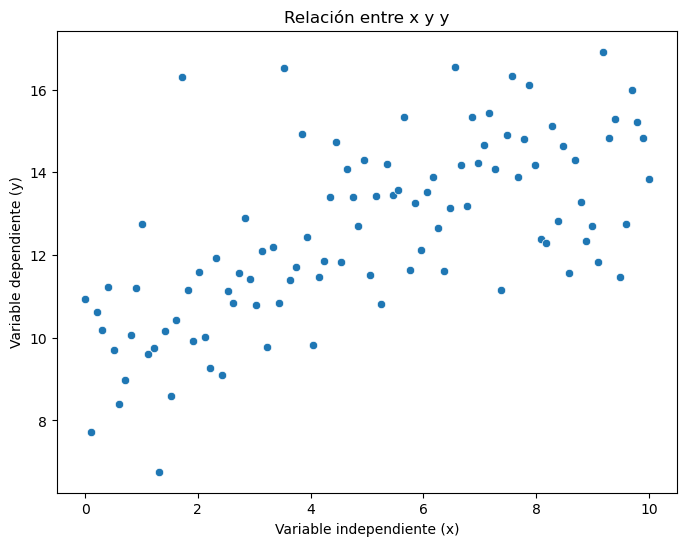

In [9]:
# Gráfica de dispersión básica
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="x", y="y")
plt.title("Relación entre x y y")
plt.xlabel("Variable independiente (x)")
plt.ylabel("Variable dependiente (y)")
plt.show()

## 6. Funciones con Type Hints

### 6.1 Función para Generar Datos

In [10]:
def generar_datos_lineales(
    n: int = 100,
    slope: float = 0.5,
    intercept: float = 1.0,
    noise_scale: float = 1.5
) -> pd.DataFrame:
    """
    Genera datos sintéticos para regresión lineal.
    
    Parámetros:
    -----------
    n : int
        Número de puntos de datos a generar
    slope : float
        Pendiente de la relación lineal
    intercept : float
        Intercepto de la relación lineal
    noise_scale : float
        Desviación estándar del ruido gaussiano
    
    Retorna:
    --------
    pd.DataFrame
        DataFrame con columnas 'x' y 'y'
    """
    X = np.linspace(0, 10, n)
    y = slope * X + intercept + np.random.normal(scale=noise_scale, size=n)
    return pd.DataFrame({"x": X, "y": y})

# Ejemplo de uso
df_nuevo = generar_datos_lineales(n=50, slope=2.0, intercept=5.0)
print("Datos generados:")
print(df_nuevo.head())

Datos generados:
          x         y
0  0.000000  6.962633
1  0.204082  5.261446
2  0.408163  6.349024
3  0.612245  6.767730
4  0.816327  5.768821


### 6.2 Función para Visualización

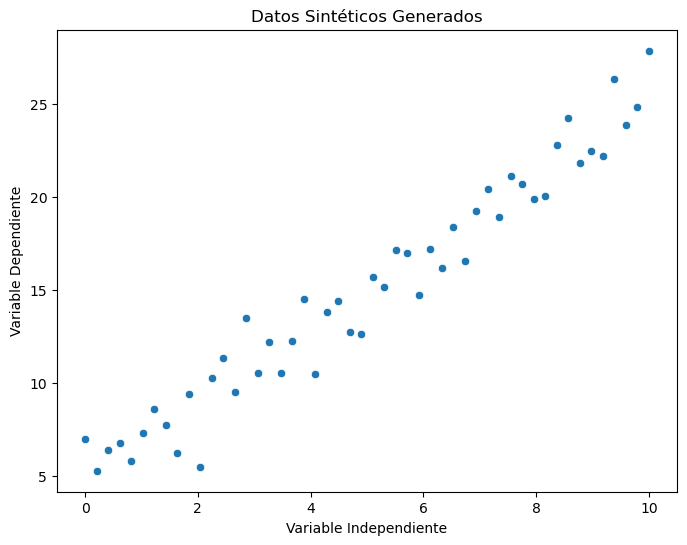

In [11]:
def crear_grafica_dispersion(
    data_frame: pd.DataFrame,
    x_col: str = "x",
    y_col: str = "y",
    titulo: str = "Gráfica de Dispersión",
    nombre_eje_x: str = "X",
    nombre_eje_y: str = "Y"
) -> None:
    """
    Crea una gráfica de dispersión con formato personalizado.
    
    Parámetros:
    -----------
    data_frame : pd.DataFrame
        DataFrame que contiene los datos
    x_col : str
        Nombre de la columna para el eje x
    y_col : str
        Nombre de la columna para el eje y
    titulo : str
        Título de la gráfica
    nombre_eje_x : str
        Etiqueta del eje x
    nombre_eje_y : str
        Etiqueta del eje y
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data_frame, x=x_col, y=y_col)
    plt.title(titulo)
    plt.xlabel(nombre_eje_x)
    plt.ylabel(nombre_eje_y)
    plt.show()

# Ejemplo de uso
crear_grafica_dispersion(
    df_nuevo, 
    titulo="Datos Sintéticos Generados",
    nombre_eje_x="Variable Independiente",
    nombre_eje_y="Variable Dependiente"
)

## 7. Regresión Lineal

### 7.1 Implementación y Ajuste del Modelo

In [12]:
# Generamos datos para trabajar
df = generar_datos_lineales(n=1000, slope=1.0, intercept=2.0, noise_scale=1.5)

# 1. Crear el modelo de regresión lineal
modelo_lr = LinearRegression()

# 2. Ajustar el modelo (entrenamiento)
# Nota: sklearn necesita X como matriz (2D) y y como vector (1D)
X_features = df[["x"]]  # Matriz 2D
y_target = df["y"]     # Vector 1D

modelo_lr.fit(X_features, y_target)

print(f"Coeficiente (pendiente): {modelo_lr.coef_[0]:.3f}")
print(f"Intercepto: {modelo_lr.intercept_:.3f}")

Coeficiente (pendiente): 1.006
Intercepto: 1.935


### 7.2 Predicciones y Evaluación

In [13]:
# 3. Hacer predicciones
y_pred_lr = modelo_lr.predict(X_features)

# 4. Evaluar el modelo
mse_lr = mean_squared_error(y_target, y_pred_lr)
print(f"Error Cuadrático Medio (MSE): {mse_lr:.3f}")

# Agregar predicciones al DataFrame para visualización
df["y_pred_lr"] = y_pred_lr

Error Cuadrático Medio (MSE): 2.369


### 7.3 Visualización del Modelo

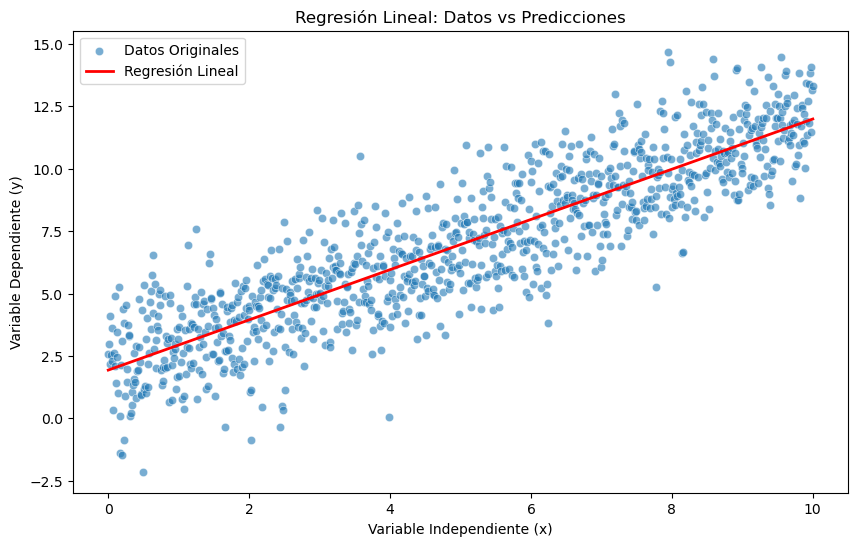

In [14]:
# Visualización de datos originales y línea de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="x", y="y", alpha=0.6, label="Datos Originales")
sns.lineplot(data=df, x="x", y="y_pred_lr", color="red", linewidth=2, label="Regresión Lineal")
plt.title("Regresión Lineal: Datos vs Predicciones")
plt.xlabel("Variable Independiente (x)")
plt.ylabel("Variable Dependiente (y)")
plt.legend()
plt.show()

## 8. K-Nearest Neighbors (KNN)

### 8.1 Implementación Básica de KNN

In [15]:
# 1. Crear modelo KNN con k=10
modelo_knn = KNeighborsRegressor(n_neighbors=10)

# 2. Ajustar el modelo
modelo_knn.fit(X_features, y_target)

# 3. Hacer predicciones
y_pred_knn = modelo_knn.predict(X_features)

# 4. Evaluar el modelo
mse_knn = mean_squared_error(y_target, y_pred_knn)
print(f"MSE KNN (k=10): {mse_knn:.3f}")
print(f"MSE Regresión Lineal: {mse_lr:.3f}")

# Agregar predicciones al DataFrame
df["y_pred_knn10"] = y_pred_knn

MSE KNN (k=10): 2.055
MSE Regresión Lineal: 2.369


### 8.2 Función para Evaluar Diferentes Valores de K

In [16]:
def evaluar_knn_diferentes_k(
    X: pd.DataFrame, 
    y: pd.Series, 
    valores_k: list
) -> dict:
    """
    Evalúa el rendimiento de KNN para diferentes valores de k.
    
    Parámetros:
    -----------
    X : pd.DataFrame
        Variables independientes
    y : pd.Series
        Variable dependiente
    valores_k : list
        Lista de valores de k a evaluar
    
    Retorna:
    --------
    dict
        Diccionario con k como clave y MSE como valor
    """
    resultados = {}
    
    for k in valores_k:
        # Crear y ajustar modelo
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X, y)
        
        # Predicciones y evaluación
        y_pred = knn.predict(X)
        mse = mean_squared_error(y, y_pred)
        
        resultados[k] = mse
        print(f"k={k}: MSE={mse:.3f}")
    
    return resultados

# Evaluar diferentes valores de k
valores_k = [1, 5, 10, 20, 50, 100]
print("Evaluando diferentes valores de k:")
resultados_k = evaluar_knn_diferentes_k(X_features, y_target, valores_k)

Evaluando diferentes valores de k:
k=1: MSE=0.000
k=5: MSE=1.837
k=10: MSE=2.055
k=20: MSE=2.206
k=50: MSE=2.335
k=100: MSE=2.367


### 8.3 Visualización de Diferentes Valores de K

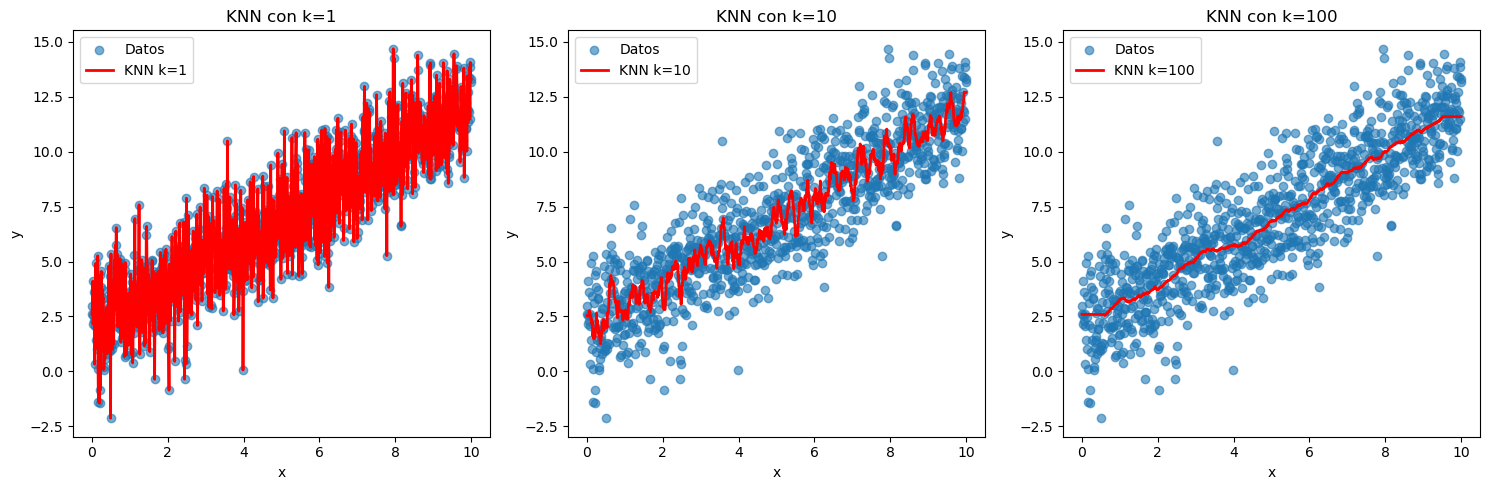

In [17]:
# Crear DataFrame para comparar diferentes valores de k
df_comparacion = df[["x", "y"]].copy()

# Agregar predicciones para diferentes valores de k
for k in [1, 10, 100]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_features, y_target)
    df_comparacion[f"y_pred_k{k}"] = knn.predict(X_features)

# Visualización comparativa
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, k in enumerate([1, 10, 100]):
    ax = axes[i]
    ax.scatter(df_comparacion["x"], df_comparacion["y"], alpha=0.6, label="Datos")
    ax.plot(df_comparacion["x"], df_comparacion[f"y_pred_k{k}"], 'r-', linewidth=2, label=f"KNN k={k}")
    ax.set_title(f"KNN con k={k}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()

plt.tight_layout()
plt.show()

## 9. Selección del Valor Óptimo de K

### 9.1 Evaluación Sistemática de K

In [18]:
# Generar un dataset más grande para la evaluación
df_grande = generar_datos_lineales(n=1000, slope=2.0, intercept=3.0, noise_scale=2.0)
X_grande = df_grande[["x"]]
y_grande = df_grande["y"]

# Rango de valores k a evaluar
max_k = min(200, len(df_grande) // 5)  # k máximo razonable
valores_k_rango = np.arange(1, max_k, 10)

print(f"Evaluando k desde 1 hasta {max_k-1} (cada 10 valores)")
print(f"Total de valores a evaluar: {len(valores_k_rango)}")

Evaluando k desde 1 hasta 199 (cada 10 valores)
Total de valores a evaluar: 20


In [19]:
# Evaluación de todos los valores de k
errores_k = []
for k in valores_k_rango:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_grande, y_grande)
    y_pred = knn.predict(X_grande)
    mse = mean_squared_error(y_grande, y_pred)
    errores_k.append(mse)

# Encontrar el k óptimo
k_optimo = valores_k_rango[np.argmin(errores_k)]
error_minimo = min(errores_k)

print(f"Valor óptimo de k: {k_optimo}")
print(f"MSE mínimo: {error_minimo:.3f}")

Valor óptimo de k: 1
MSE mínimo: 0.000


### 9.2 Visualización de la Curva de Error vs K

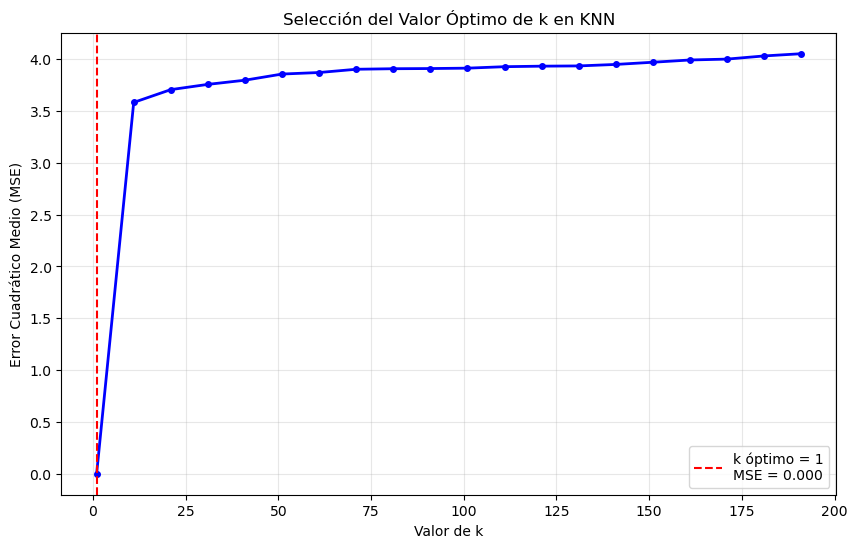

In [20]:
# Gráfica de MSE vs k
plt.figure(figsize=(10, 6))
plt.plot(valores_k_rango, errores_k, 'b-', linewidth=2, marker='o', markersize=4)
plt.axvline(x=k_optimo, color='r', linestyle='--', 
            label=f'k óptimo = {k_optimo}\nMSE = {error_minimo:.3f}')
plt.xlabel('Valor de k')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Selección del Valor Óptimo de k en KNN')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 10. Estimación del Error Real

### 10.1 División Train-Test

In [21]:
# Generar dataset para validación
np.random.seed(42)  # Para reproducibilidad
df_validacion = generar_datos_lineales(n=2000, slope=1.5, intercept=2.5, noise_scale=2.0)

# División train-test
X_val = df_validacion[["x"]]
y_val = df_validacion["y"]

X_train, X_test, y_train, y_test = train_test_split(
    X_val, y_val, test_size=0.3, random_state=42
)

print(f"Datos de entrenamiento: {X_train.shape[0]}")
print(f"Datos de prueba: {X_test.shape[0]}")

Datos de entrenamiento: 1400
Datos de prueba: 600


### 10.2 Función para Evaluación Train-Test

In [22]:
def evaluar_modelo_train_test(
    X_train: pd.DataFrame,
    X_test: pd.DataFrame,
    y_train: pd.Series,
    y_test: pd.Series,
    k: int
) -> tuple:
    """
    Evalúa KNN usando división train-test.
    
    Retorna:
    --------
    tuple
        (error_entrenamiento, error_prueba)
    """
    # Entrenar el modelo
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predicciones
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    # Errores
    error_train = mean_squared_error(y_train, y_train_pred)
    error_test = mean_squared_error(y_test, y_test_pred)
    
    return error_train, error_test

# Evaluar diferentes valores de k
valores_k_test = [1, 5, 10, 20, 50, 100]
errores_train = []
errores_test = []

print("Evaluación con división train-test:")
print("-" * 40)
for k in valores_k_test:
    error_train, error_test = evaluar_modelo_train_test(X_train, X_test, y_train, y_test, k)
    errores_train.append(error_train)
    errores_test.append(error_test)
    print(f"k={k:2d} | Train MSE: {error_train:.3f} | Test MSE: {error_test:.3f}")

Evaluación con división train-test:
----------------------------------------
k= 1 | Train MSE: 0.000 | Test MSE: 7.600
k= 5 | Train MSE: 3.092 | Test MSE: 5.007
k=10 | Train MSE: 3.436 | Test MSE: 4.425
k=20 | Train MSE: 3.641 | Test MSE: 4.214
k=50 | Train MSE: 3.820 | Test MSE: 4.016
k=100 | Train MSE: 3.874 | Test MSE: 3.975


### 10.3 Visualización de Sesgo vs Varianza

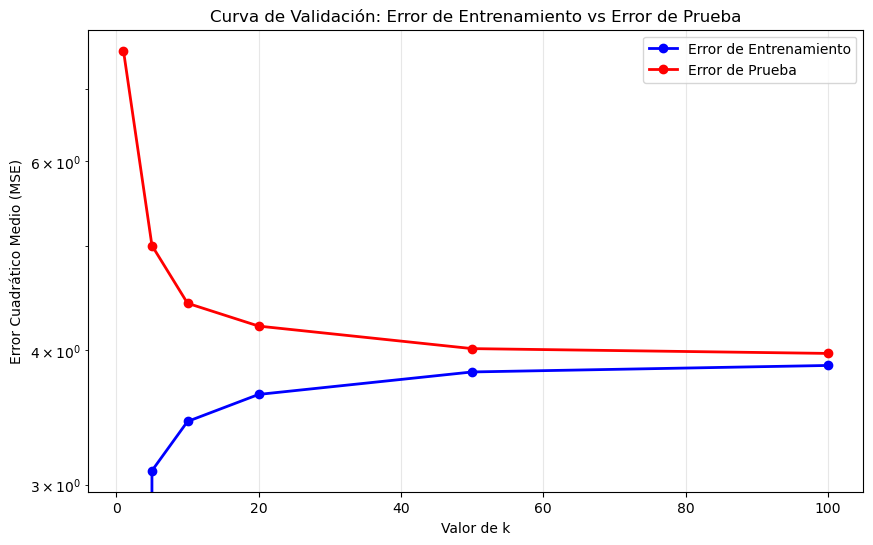

In [23]:
# Gráfica de error de entrenamiento vs error de prueba
plt.figure(figsize=(10, 6))
plt.plot(valores_k_test, errores_train, 'b-o', linewidth=2, label='Error de Entrenamiento')
plt.plot(valores_k_test, errores_test, 'r-o', linewidth=2, label='Error de Prueba')
plt.xlabel('Valor de k')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Curva de Validación: Error de Entrenamiento vs Error de Prueba')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Escala logarítmica para mejor visualización
plt.show()

### 10.4 Comparación Final: Regresión Lineal vs KNN Óptimo

In [24]:
# Encontrar el k óptimo basado en error de prueba
k_optimo_test = valores_k_test[np.argmin(errores_test)]
print(f"Valor óptimo de k (basado en error de prueba): {k_optimo_test}")

# Evaluar regresión lineal
lr_final = LinearRegression()
lr_final.fit(X_train, y_train)
y_test_pred_lr = lr_final.predict(X_test)
error_test_lr = mean_squared_error(y_test, y_test_pred_lr)

# Evaluar KNN óptimo
knn_final = KNeighborsRegressor(n_neighbors=k_optimo_test)
knn_final.fit(X_train, y_train)
y_test_pred_knn = knn_final.predict(X_test)
error_test_knn = mean_squared_error(y_test, y_test_pred_knn)

print("\n" + "="*50)
print("COMPARACIÓN FINAL - ERROR DE PRUEBA (ESTIMACIÓN REAL)")
print("="*50)
print(f"Regresión Lineal:        {error_test_lr:.3f}")
print(f"KNN (k={k_optimo_test}):             {error_test_knn:.3f}")
print("="*50)

if error_test_knn < error_test_lr:
    mejora = ((error_test_lr - error_test_knn) / error_test_lr) * 100
    print(f"KNN es mejor por {mejora:.1f}%")
else:
    mejora = ((error_test_knn - error_test_lr) / error_test_knn) * 100
    print(f"Regresión Lineal es mejor por {mejora:.1f}%")

Valor óptimo de k (basado en error de prueba): 100

COMPARACIÓN FINAL - ERROR DE PRUEBA (ESTIMACIÓN REAL)
Regresión Lineal:        3.887
KNN (k=100):             3.975
Regresión Lineal es mejor por 2.2%


## Resumen

En este notebook hemos cubierto:

1. **NumPy**: Creación y manipulación de arrays para datos numéricos
2. **Pandas**: Manipulación de datos estructurados con DataFrames
3. **Iteración**: Técnicas para iterar sobre diccionarios y listas
4. **Visualización**: Creación de gráficas informativas con matplotlib/seaborn
5. **Type Hints**: Definición de funciones bien documentadas y tipadas
6. **Regresión Lineal**: Implementación, ajuste y evaluación
7. **KNN**: Implementación y comparación de diferentes valores de k
8. **Selección de Hiperparámetros**: Técnicas para encontrar el k óptimo
9. **Validación**: Estimación del error real usando división train-test

### Conceptos Clave Aprendidos:

- **Sesgo vs Varianza**: KNN con k pequeño tiene alta varianza, k grande tiene alto sesgo
- **Validación**: El error de entrenamiento subestima el error real
- **Selección de Modelos**: Comparar diferentes algoritmos usando datos de prueba
- **Type Hints**: Mejoran la legibilidad y mantenibilidad del código